In [128]:
import pandas as pd
import numpy as np

early_access = pd.read_csv('../data/early_access.csv')
early_access.head()
#pd.read_csv(file, index_col=0, parse_dates=True)

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Playtime (Median),Developer(s),Publisher(s)
0,1361,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mar 23, 2017",$29.99,14% (58%),"22,175,874 ±139,693",134:56 (85:12),"Bluehole, Inc.","Bluehole, Inc."
1,51,Paladins,"Sep 15, 2016",Free,61% (86%),"15,387,243 ±117,216",21:40 (04:05),Hi-Rez Studios,Hi-Rez Studios
2,799,H1Z1,"Feb 17, 2016",$5,18% (62%),"7,619,612 ±83,166",89:39 (19:01),Daybreak Game Company,Daybreak Game Company
3,1735,Rust,"Dec 11, 2013",$9.99,46% (80%),"6,211,019 ±75,197",118:53 (24:24),Facepunch Studios,Facepunch Studios
4,491,BLOCKADE 3D,"Dec 19, 2014",Free,15% (59%),"4,066,429 ±60,981",06:41 (00:50),Shumkov Dmitriy,Shumkov Dmitriy


In [129]:
games = pd.read_csv('../data/games.csv')
games.head()

,appid,name
0,5,Dedicated Server
1,7,Steam Client
2,8,winui2
3,10,Counter-Strike
4,20,Team Fortress Classic


In [130]:
early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
early_access.head()

,Rank,name,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s)
0,1361,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mar 23, 2017",$29.99,14% (58%),"22,175,874 ±139,693",134:56 (85:12),"Bluehole, Inc.","Bluehole, Inc."
1,51,Paladins,"Sep 15, 2016",Free,61% (86%),"15,387,243 ±117,216",21:40 (04:05),Hi-Rez Studios,Hi-Rez Studios
2,799,H1Z1,"Feb 17, 2016",$5,18% (62%),"7,619,612 ±83,166",89:39 (19:01),Daybreak Game Company,Daybreak Game Company
3,1735,Rust,"Dec 11, 2013",$9.99,46% (80%),"6,211,019 ±75,197",118:53 (24:24),Facepunch Studios,Facepunch Studios
4,491,BLOCKADE 3D,"Dec 19, 2014",Free,15% (59%),"4,066,429 ±60,981",06:41 (00:50),Shumkov Dmitriy,Shumkov Dmitriy


In [131]:
early_access_merged = pd.merge(games, early_access, on='name', how='inner')
early_access_merged.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s)
0,15540,1... 2... 3... KICK IT! (Drop That Beat Like a...,1150,NaN,$9.99,2% (31%),"101,492 ±9,673",01:55 (00:34),"Dejobaan Games, LLC","Dejobaan Games, LLC"
1,17740,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios
2,608580,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios
3,72200,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army
4,80776,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army


In [132]:
ex_early_access = pd.read_csv('../data/ex_early_access.csv')
ex_early_access.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Players,Playtime (Median),Developer(s),Publisher(s)
0,3,Unturned,"Jul 7, 2017",Free,77% (91%),"33,271,879 ±170,143","26,700,880 ±153,527",21:41 (02:37),Smartly Dressed Games,Smartly Dressed Games
1,8,Heroes & Generals,"Oct 18, 2016",Free,23% (66%),"15,925,380 ±119,958","11,309,367 ±101,586",12:44 (00:51),Reto-Moto,Reto-Moto
2,10,Robocraft,"Aug 24, 2017",Free,31% (72%),"13,613,099 ±111,181","9,937,824 ±95,365",18:55 (02:12),Freejam,Freejam
3,6,Brawlhalla,"Oct 17, 2017",Free,58% (85%),"8,122,044 ±86,379","7,478,034 ±82,940",13:58 (02:13),Blue Mammoth Games,Blue Mammoth Games
4,79,ARK: Survival Of The Fittest,"Aug 29, 2017",NaN,21% (64%),"7,441,645 ±82,741","1,978,919 ±42,912",04:02 (00:23),"Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard


In [133]:
ex_early_access.columns = ['Rank', 'name', 'Release date', 'Price', 'Score rank(Userscore/Metascore)', 'Owners', 'Players', 'Playtime(Median)', 'Developer(s)', 'Publisher(s)']
ex_early_access.head()

,Rank,name,Release date,Price,Score rank(Userscore/Metascore),Owners,Players,Playtime(Median),Developer(s),Publisher(s)
0,3,Unturned,"Jul 7, 2017",Free,77% (91%),"33,271,879 ±170,143","26,700,880 ±153,527",21:41 (02:37),Smartly Dressed Games,Smartly Dressed Games
1,8,Heroes & Generals,"Oct 18, 2016",Free,23% (66%),"15,925,380 ±119,958","11,309,367 ±101,586",12:44 (00:51),Reto-Moto,Reto-Moto
2,10,Robocraft,"Aug 24, 2017",Free,31% (72%),"13,613,099 ±111,181","9,937,824 ±95,365",18:55 (02:12),Freejam,Freejam
3,6,Brawlhalla,"Oct 17, 2017",Free,58% (85%),"8,122,044 ±86,379","7,478,034 ±82,940",13:58 (02:13),Blue Mammoth Games,Blue Mammoth Games
4,79,ARK: Survival Of The Fittest,"Aug 29, 2017",NaN,21% (64%),"7,441,645 ±82,741","1,978,919 ±42,912",04:02 (00:23),"Studio Wildcard, Instinct Games, Efecto Studio...",Studio Wildcard


In [134]:
ex_early_access_merged = pd.merge(games, ex_early_access, on='name', how='inner')
ex_early_access_merged.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Players,Playtime(Median),Developer(s),Publisher(s)
0,25000,Overgrowth,145,"Oct 16, 2017",$29.99,34% (74%),"261,560 ±15,628","132,856 ±11,140",07:48 (03:06),Wolfire Games,Wolfire Games
1,107410,Arma 3,5,"Sep 12, 2013",$13.59,74% (90%/74%),"3,634,735 ±58,056","3,528,255 ±57,206",186:54 (32:44),Bohemia Interactive,Bohemia Interactive
2,200110,Nosgoth,939,"Mar 26, 2014",Free,N/A (N/A),"4,323,437 ±63,273","2,352,821 ±46,772",07:26 (00:56),Psyonix,Square Enix
3,202090,Magicka: Wizard Wars,393,"Apr 28, 2015",NaN,N/A (N/A/69%),"3,631,316 ±58,029","1,987,956 ±43,009",03:32 (00:48),Paradox North,Paradox Interactive
4,207140,SpeedRunners,57,"Apr 19, 2016",$3.74,89% (94%/84%),"1,634,080 ±39,008","1,391,325 ±36,003",11:32 (04:14),DoubleDutch Games,tinyBuild


### Added the column for 'is early access' and set values to True or False respectively. Combined the tables, early_access_merged with ex_early_access_merged to have all the info in one table

In [135]:
early_access_merged['is early access?'] = True
ex_early_access_merged['is early access?'] = False

full_table = pd.merge(early_access_merged, ex_early_access_merged, how='outer')
full_table.to_pickle('../data/early_access pickle')
full_table.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s),is early access?,Players
0,15540,1... 2... 3... KICK IT! (Drop That Beat Like a...,1150,NaN,$9.99,2% (31%),"101,492 ±9,673",01:55 (00:34),"Dejobaan Games, LLC","Dejobaan Games, LLC",True,NaN
1,17740,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios,True,NaN
2,608580,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios,True,NaN
3,72200,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army,True,NaN
4,80776,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army,True,NaN


In [136]:
# Changed NaN in release date for early access to not released because the game is not released yet
full_table['Release date'].fillna('Not released', inplace=True)
full_table.head()

,appid,name,Rank,Release date,Price,Score rank(Userscore/Metascore),Owners,Playtime(Median),Developer(s),Publisher(s),is early access?,Players
0,15540,1... 2... 3... KICK IT! (Drop That Beat Like a...,1150,Not released,$9.99,2% (31%),"101,492 ±9,673",01:55 (00:34),"Dejobaan Games, LLC","Dejobaan Games, LLC",True,NaN
1,17740,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios,True,NaN
2,608580,Empires,1183,"May 31, 2017",NaN,N/A (N/A),"737 ±1,444",00:00 (00:00),Interactive Gaming Studios,Interactive Gaming Studios,True,NaN
3,72200,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army,True,NaN
4,80776,Universe Sandbox,180,"Aug 24, 2015",$16.74,85% (93%),"314,360 ±17,021",13:31 (03:11),Giant Army,Giant Army,True,NaN


### For clarity sake, I just put in the conversions on price for the full table because that is the table that we will use since it has information on if the game is currently early access or not

In [137]:
#In the Price column, the $ sign was removed and made Free into 0 so that it would be easier to manipulate data
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('$', '')
ex_early_access_merged['Price'] = ex_early_access_merged['Price'].str.replace('Free', '0')

In [138]:
full_table['Price'] = full_table['Price'].str.replace('$', '')
full_table['Price'] = full_table['Price'].str.replace('Free', '0')

In [139]:
#Converting all values in Price column into numeric values 
ex_early_access_merged['Price'] = pd.to_numeric(ex_early_access_merged['Price'], errors='coerce')
print ex_early_access_merged['Price'].head()

In [140]:
full_table['Price'] = pd.to_numeric(ex_early_access_merged['Price'], errors='coerce')
print full_table['Price'].head()

In [141]:
#ex_early_access_merged

In [142]:
#average price per game 
print ex_early_access_merged['Price'].mean()

In [143]:
print full_table['Price'].mean()

In [144]:
ex_early_access_merged['Rank'].replace('',np.NaN) #replaces blank with NaN
ex_early_access_merged['Rank'].max() #highest rank seems to be 1043

1102

In [145]:
full_table['Rank'].replace('',np.NaN) #replaces blank with NaN
full_table['Rank'].max() #highest rank seems to be 1574

2062.0

In [146]:
ex_early_access_merged['Rank'].median() #checking to make sure it gives back a number

558.0

In [147]:
# seems the most expensive game is $65, I would think there would be a game more expensive than 65 bucks.
ex_early_access_merged['Price'].max() 

50.990000000000002

In [148]:
full_table['Price'].max() 

50.990000000000002

In [149]:
import matplotlib.pyplot as plt

In [150]:
# This graph shows distribution of price of games in our data set 
bins= [0,1,5,10,20,30,40,50,65]
plt.hist(ex_early_access_merged.Price, bins=bins, color="y")
plt.xticks(bins)
plt.show() 

ValueError: range parameter must be finite.

In [ ]:
ex_early_access_merged['year'] = ex_early_access_merged['Release date'].str.split(',').str[1]
ex_early_access_merged.head()

In [ ]:
full_table['year'] = full_table['Release date'].str.split(',').str[1]
full_table['year'].fillna('Not released', inplace=True)
full_table.head()

# Writing full table to a csv file to be used

In [ ]:
full_table.to_csv('../data/full_table')

In [ ]:
dff2 = ex_early_access_merged[['Score rank(Userscore/Metascore)', 'year']]
dff2.head()

In [ ]:
#Converting all values in year column into numeric values 
dff2['year'] = pd.to_numeric(dff2['year'], errors='coerce')
dff2.head()

In [ ]:
dff2['Score (%)'] = dff2['Score rank(Userscore/Metascore)'].str.split('%').str[0]
dff2['Score (%)'] = dff2['Score rank(Userscore/Metascore)'].str.split('(').str[0]
dff3 = dff2[['Score (%)','year']]
dff3['Score (%)'] = dff3['Score (%)'].str.replace('N/A', '0')
dff3['Score (%)'] = dff3['Score (%)'].str.replace('%', '')
dff3['Score (%)'] = pd.to_numeric(dff3['Score (%)'], errors='coerce')
dff3[(dff3 != 0).all(1)].head()

# New data set to be worked with

### Went ahead and wrote both early and ex early access to csv files

In [168]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [169]:
new_early_access = pd.read_json('../data/early_access.json').transpose()
new_early_access.to_csv('../data/new_early_access')
new_early_access.head()

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,tags,userscore
108600,108600,287,1406,1277,The Indie Stone,103,396,Project Zomboid,2000,877937,...,35373,5765,839125,28058,13998,899,The Indie Stone,64,"{u'Building': 339, u'Crafting': 423, u'Co-op':...",87
15540,15540,0,84,0,"Dejobaan Games, LLC",0,27,1... 2... 3... KICK IT! (Drop That Beat Like a...,308,106119,...,0,0,77133,8513,145,999,"Dejobaan Games, LLC",2,"{u'Singleplayer': 15, u'Indie': 57, u'Procedur...",31
206500,206500,64,589,94,Carbon Games,27,98,AirMech Strike,1098,1536266,...,12774,3464,986757,30421,6845,0,Carbon Games,61,"{u'PvP': 69, u'Mechs': 219, u'Free to Play': 4...",86
215830,215830,929,929,200,Naddic Games,1099,1099,Closers,14,1720,...,1720,1271,1720,1271,86,1499,En Masse Entertainment,61,"{u'Hack and Slash': 7, u'Massively Multiplayer...",85
221100,221100,414,5110,4529,Bohemia Interactive,100,1324,DayZ,63041,3763533,...,126999,10923,3729142,58972,111859,2799,Bohemia Interactive,19,"{u'PvP': 3940, u'Shooter': 1893, u'Atmospheric...",63


In [170]:
new_ex_early_access = pd.read_json('../data/ex_early_access.json').transpose()
new_ex_early_access.to_csv('../data/new_ex_early_access.csv')
new_ex_early_access.head()

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,tags,userscore
107410,107410,863,11316,36011,Bohemia Interactive,241,1981,Arma 3,9296,3652501,...,400156,19384,3543926,57500,86185,1359,Bohemia Interactive,74,"{u'TrackIR': 548, u'First-Person': 930, u'Shoo...",90
200110,200110,13,443,14,Psyonix,25,56,Nosgoth,3860,4290196,...,1475,2042,2330438,46686,11015,0,Square Enix,,"{u'PvP': 285, u'Shooter': 133, u'Atmospheric':...",0
200150,200150,0,158,0,"Olde Sküül, Sculptured Software",0,132,Battle Chess: Game of Kings,95,7124,...,0,0,6632,2496,88,1499,Interplay Entertainment Corp.,8,"{u'Casual': 22, u'Board Game': 7, u'Chess': 23...",47
202090,202090,1,227,1,Paradox North,1,49,Magicka: Wizard Wars,1708,3621304,...,1720,1271,1974497,42989,9721,0,Paradox Interactive,,"{u'PvP': 266, u'Multiplayer': 305, u'Magic': 3...",0
207140,207140,77,633,938,DoubleDutch Games,29,255,SpeedRunners,1255,1633787,...,56007,7254,1390598,36099,18830,374,tinyBuild,85,"{u'4 Player Local': 112, u'Co-op': 57, u'Super...",94


In [171]:
# Currently not working. We can solve or do analysis separate

#new_full_table = new_early_access.merge(new_ex_early_access, how='outer')
#new_full_table.head()

In [172]:
new_early_access.userscore.mean()

61.5198606271777

In [173]:
new_ex_early_access.userscore.mean()

69.015260323159779

### Made a stars column to place userscores in categories. Based it on a 1-5 star rating system. 0-20 is 1 star, 21-40 is 2 star, ... , 81-100 is 5 star. In the 3 cells below is where this is done.

In [174]:
stars_early = pd.cut(new_early_access.userscore, [-1,21,41,61,81,101], 
               labels=['one star', 'two star', 'three star', 'four star', 'five star'],
              right=False, include_lowest=True)

In [175]:
stars_ex_early = pd.cut(new_ex_early_access.userscore, [-1,21,41,61,81,101], 
               labels=['one star', 'two star', 'three star', 'four star', 'five star'],
              right=False, include_lowest=True)

In [176]:
new_early_access['stars'] = stars_early
new_ex_early_access['stars'] = stars_ex_early

### Graph showing that the higher rated games have more owners. 

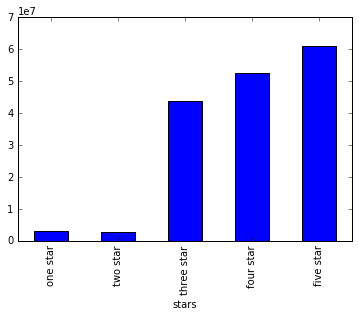

In [177]:
new_early_access.groupby(['stars'])['owners'].sum().plot(kind='bar')
plt.show()

In [178]:
#This makes the price data look like real dollar values
new_early_access['price'] = new_early_access['price'].astype(float)
new_early_access['price'] = new_early_access['price']/100

In [179]:
#This makes the price data look like real dollar values
new_ex_early_access['price'] = new_ex_early_access['price'].astype(float)
new_ex_early_access['price'] = new_ex_early_access['price']/100

In [180]:
new_early_access.price.max()

50.990000000000002

In [181]:
new_ex_early_access.price.max()

179.0

### Was attempting to sort the values for price of the ex early access games to get a better guess on how to divide it up. I wanted to do something similar to what I did above with the star ratings.  I wanted to do a pd.cut() on the prices and display them on graphs relative to number of owners. Will get back to this, if someone else wants to help, you are more than welcome

###   -Michael

In [182]:
#new_temp = new_ex_early_access['price']


In [183]:
#hold = new_temp.sort()